# SVM Tuning

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import SVM
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-17 00:11:11.985 | INFO     | assignment_2.digits_classifiers.io:read_datasets:40 - Reading datasets


In [3]:
X, y = data

## Removing constant columns

In [4]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [5]:
X.drop(columns=always_zero, axis=1, inplace=True)

## Discard part of data

In [6]:
X, _, y, _ = train_test_split(X, y, test_size=0.95)

## Train Test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [8]:
X_train

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

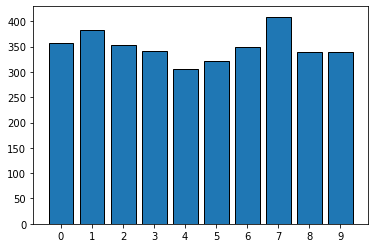

In [10]:
data.digit_distribution()

## Training SVM

### Linear SVM

In [11]:
linears = [
    SVM(train=train, test=test, params={"kernel": 'linear', "C": c})
    for c in [1, 2, 5, 10]
]

In [12]:
tuning_linears = ClassifierTuning(classifiers=linears, base_estimator=SVM.default_estimator(), data=train, k=5)
tuning_linears

[Estimator: SVC(); K: 5; Params: {'kernel': ['linear'], 'C': [1, 2, 10, 5], 'degree': [3]}]

In [13]:
tuning_linears.evaluate()

In [14]:
best_linear = SVM(train=train, test=test, params=tuning_linears.best_params)
best_linear

[LinearSVM: Train 2800, Test 700, not fitted, not predicted][C: 1]

In [15]:
best_linear.train()
best_linear.predict()
best_linear.accuracy

0.9157142857142857

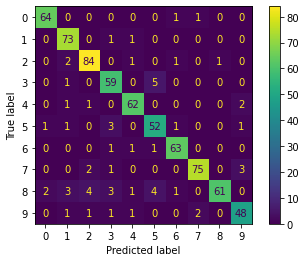

In [16]:
best_linear.confusion_matrix()

### Polynomial SVM

In [17]:
polys = [
    SVM(train=train, test=test, params={"kernel": 'poly', "C": c, "degree": d})
    for c in [1, 2, 5, 10]
    for d in [2, 3, 4]
]

In [18]:
tuning_polys = ClassifierTuning(classifiers=polys, base_estimator=SVM.default_estimator(), data=train, k=5)
tuning_polys

[Estimator: SVC(); K: 5; Params: {'kernel': ['poly'], 'C': [1, 2, 10, 5], 'degree': [2, 3, 4]}]

In [19]:
tuning_polys.evaluate()

In [20]:
best_polys = SVM(train=train, test=test, params=tuning_polys.best_params)
best_polys

[PolynomialSVM: Train 2800, Test 700, not fitted, not predicted] [C: 2; degree: 2]

In [21]:
best_polys.train()
best_polys.predict()
best_polys.accuracy

0.9442857142857143

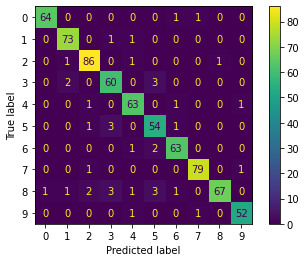

In [22]:
best_polys.confusion_matrix()

### RBF Kernel SVM

In [23]:
rbfs = [
    SVM(train=train, test=test, params={"kernel": 'rbf', "C": c})
    for c in [1, 2, 5, 10]
]

In [24]:
tuning_rbfs = ClassifierTuning(classifiers=rbfs, base_estimator=SVM.default_estimator(), data=train, k=5)
tuning_rbfs

[Estimator: SVC(); K: 5; Params: {'kernel': ['rbf'], 'C': [1, 2, 10, 5], 'degree': [3]}]

In [25]:
tuning_rbfs.evaluate()

In [26]:
best_rbfs = SVM(train=train, test=test, params=tuning_rbfs.best_params)
best_rbfs

[RBFKernelSVM: Train 2800, Test 700, not fitted, not predicted][C: 2]

In [27]:
best_rbfs.train()
best_rbfs.predict()
best_rbfs.accuracy

0.9514285714285714

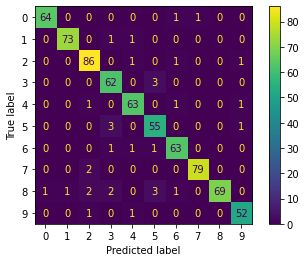

In [28]:
best_rbfs.confusion_matrix()